NaN values in features:
Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64

NaN values in target (Health_Issues): 5941

After cleaning - X shape: (4059, 14), y shape: (4059,)
Model trained successfully!
Predictions: ['Mild' 'Mild' 'Moderate' 'Mild' 'Mild' 'Mild' 'Mild' 'Mild' 'Mild' 'Mild']
Accuracy: 0.9175

Classification Report:
              precision    recall  f1-score   support

        Mild       0.95      0.97      0.96       720
    Moderate       0.64      0.55      0.59        88
      Severe       0.50      0.25      0.33         4

    accuracy                           0.92       812
   macro avg       0.70    

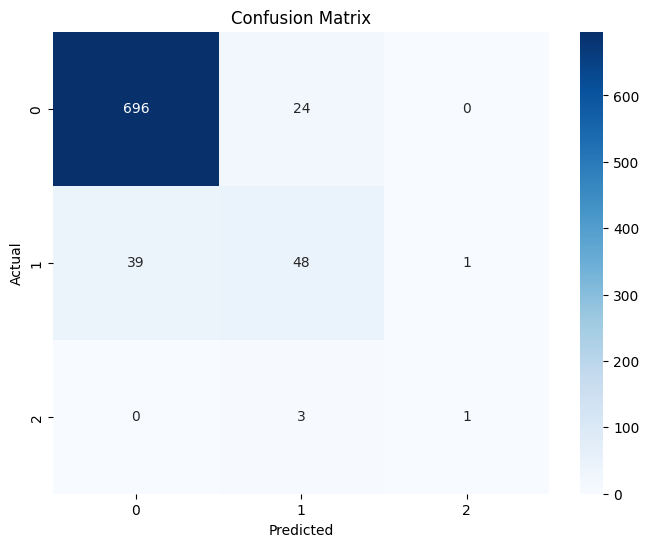

Cross-validation scores: [0.92364532 0.92118227 0.90517241 0.92857143 0.9161529 ]
Mean CV Accuracy: 0.9189 (+/- 0.0159)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


file_path = r"C:\Users\safwan\Downloads\archive\synthetic_coffee_health_10000.csv"
df = pd.read_csv(file_path, encoding='utf-8')


feature_columns = [
    'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg', 
    'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 
    'Stress_Level', 'Physical_Activity_Hours', 'Occupation', 
    'Smoking', 'Alcohol_Consumption'
]

X = df[feature_columns]
y = df['Health_Issues']


print("NaN values in features:")
print(X.isnull().sum())
print(f"\nNaN values in target (Health_Issues): {y.isnull().sum()}")


valid_indices = y.notna()
X = X[valid_indices]
y = y[valid_indices]

print(f"\nAfter cleaning - X shape: {X.shape}, y shape: {y.shape}")


categorical_features = [
    'Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 
    'Occupation', 'Smoking', 'Alcohol_Consumption'
]


numerical_features = [
    'Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 
    'BMI', 'Heart_Rate', 'Physical_Activity_Hours'
]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Model trained successfully!")
print(f"Predictions: {y_pred[:10]}")



accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

